In [1]:
import os
import clip
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR100

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=False, train=False)
random_image_indexes = [np.random.randint(len(cifar100)) for _ in range(10)]

cifar100_mapping = [
    'apple', # id 0
    'aquarium_fish',
    'baby',
    'bear',
    'beaver',
    'bed',
    'bee',
    'beetle',
    'bicycle',
    'bottle',
    'bowl',
    'boy',
    'bridge',
    'bus',
    'butterfly',
    'camel',
    'can',
    'castle',
    'caterpillar',
    'cattle',
    'chair',
    'chimpanzee',
    'clock',
    'cloud',
    'cockroach',
    'couch',
    'crab',
    'crocodile',
    'cup',
    'dinosaur',
    'dolphin',
    'elephant',
    'flatfish',
    'forest',
    'fox',
    'girl',
    'hamster',
    'house',
    'kangaroo',
    'computer_keyboard',
    'lamp',
    'lawn_mower',
    'leopard',
    'lion',
    'lizard',
    'lobster',
    'man',
    'maple_tree',
    'motorcycle',
    'mountain',
    'mouse',
    'mushroom',
    'oak_tree',
    'orange',
    'orchid',
    'otter',
    'palm_tree',
    'pear',
    'pickup_truck',
    'pine_tree',
    'plain',
    'plate',
    'poppy',
    'porcupine',
    'possum',
    'rabbit',
    'raccoon',
    'ray',
    'road',
    'rocket',
    'rose',
    'sea',
    'seal',
    'shark',
    'shrew',
    'skunk',
    'skyscraper',
    'snail',
    'snake',
    'spider',
    'squirrel',
    'streetcar',
    'sunflower',
    'sweet_pepper',
    'table',
    'tank',
    'telephone',
    'television',
    'tiger',
    'tractor',
    'train',
    'trout',
    'tulip',
    'turtle',
    'wardrobe',
    'whale',
    'willow_tree',
    'wolf',
    'woman',
    'worm'
    ]

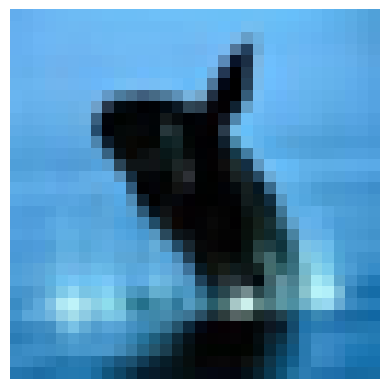

Dla powyższego obrazka top 5 najlepszych predykcji to:

           whale: 39.18%
         dolphin: 23.03%
   aquarium_fish: 12.33%
        flatfish: 3.17%
            seal: 2.98%
Poprawną etykietą obrazka jest: whale
----------------------------------------------------------------


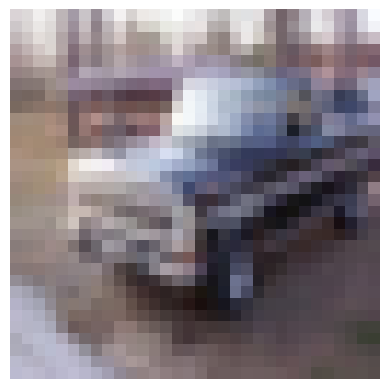

Dla powyższego obrazka top 5 najlepszych predykcji to:

    pickup_truck: 99.71%
      lawn_mower: 0.13%
         tractor: 0.06%
    sweet_pepper: 0.02%
            baby: 0.01%
Poprawną etykietą obrazka jest: pickup_truck
----------------------------------------------------------------


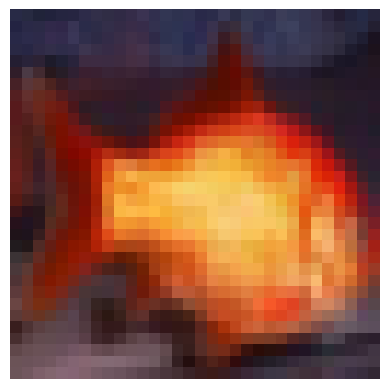

Dla powyższego obrazka top 5 najlepszych predykcji to:

          rocket: 14.82%
        flatfish: 9.28%
           whale: 7.34%
   aquarium_fish: 6.90%
             ray: 6.68%
Poprawną etykietą obrazka jest: aquarium_fish
----------------------------------------------------------------


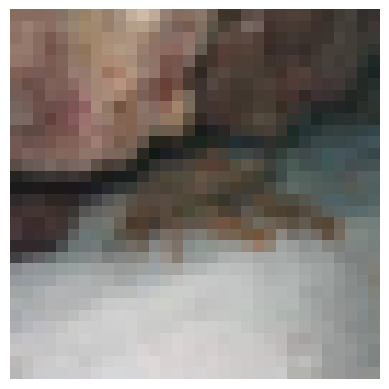

Dla powyższego obrazka top 5 najlepszych predykcji to:

           shrew: 27.22%
          lizard: 20.24%
            crab: 4.45%
           snake: 4.17%
         hamster: 3.20%
Poprawną etykietą obrazka jest: lobster
----------------------------------------------------------------


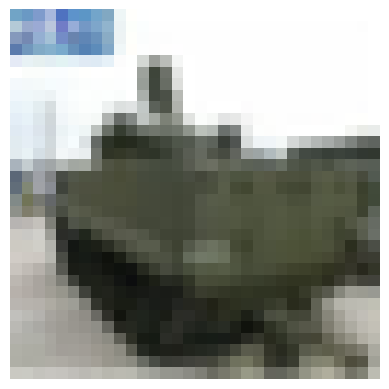

Dla powyższego obrazka top 5 najlepszych predykcji to:

            tank: 95.85%
      lawn_mower: 0.83%
    pickup_truck: 0.43%
         tractor: 0.42%
             bus: 0.20%
Poprawną etykietą obrazka jest: tank
----------------------------------------------------------------


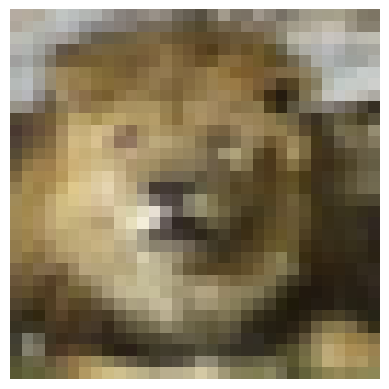

Dla powyższego obrazka top 5 najlepszych predykcji to:

            lion: 80.42%
            bear: 5.30%
           tiger: 2.58%
          beaver: 1.15%
      lawn_mower: 0.74%
Poprawną etykietą obrazka jest: lion
----------------------------------------------------------------


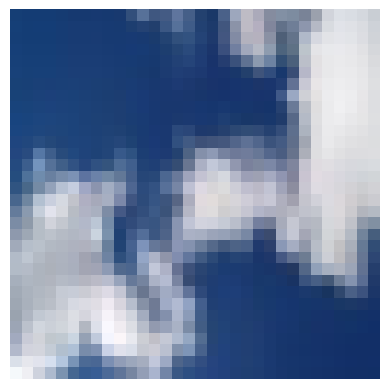

Dla powyższego obrazka top 5 najlepszych predykcji to:

           cloud: 18.16%
           plain: 6.58%
      skyscraper: 3.93%
      maple_tree: 3.81%
           plate: 3.58%
Poprawną etykietą obrazka jest: cloud
----------------------------------------------------------------


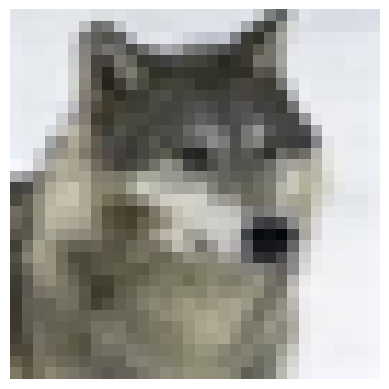

Dla powyższego obrazka top 5 najlepszych predykcji to:

            wolf: 88.72%
             fox: 3.28%
         raccoon: 1.48%
        kangaroo: 0.79%
          possum: 0.51%
Poprawną etykietą obrazka jest: wolf
----------------------------------------------------------------


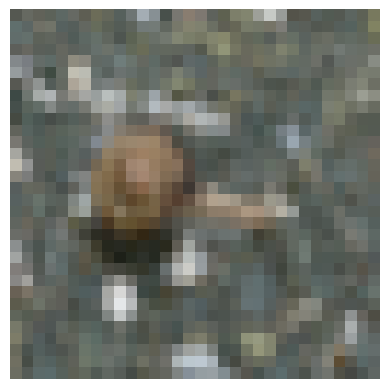

Dla powyższego obrazka top 5 najlepszych predykcji to:

           snail: 6.67%
       pine_tree: 5.27%
        mushroom: 4.24%
      lawn_mower: 3.35%
        oak_tree: 3.20%
Poprawną etykietą obrazka jest: snail
----------------------------------------------------------------


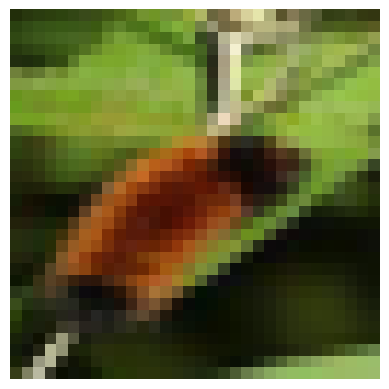

Dla powyższego obrazka top 5 najlepszych predykcji to:

      lawn_mower: 15.99%
          beetle: 10.49%
             bee: 8.69%
      maple_tree: 8.56%
     caterpillar: 6.56%
Poprawną etykietą obrazka jest: caterpillar
----------------------------------------------------------------


In [2]:
for index in random_image_indexes:
    image, class_id = cifar100[index]
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    image_input = preprocess(image).unsqueeze(0).to(device)
    text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_inputs)

    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    values, indices = similarity[0].topk(5)

    print("Dla powyższego obrazka top 5 najlepszych predykcji to:\n")
    for value, index in zip(values, indices):
        print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")
    print(f"Poprawną etykietą obrazka jest: {cifar100_mapping[class_id]}")
    print(64*"-")